In [1]:
import os
import numpy as np
import random
import shutil

In [2]:
data_path = "data"
dataset_path = "dataset"
classes = ['bg', 'dog', 'turtle']
class_size = 1000
val_split = 0.1
test_split = 0.1

In [15]:

#synthetic data
def copyToDir(files, split_name):
    path = os.path.join(dataset_path, split_name, c)

    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

    for f in files:
        shutil.copyfile(os.path.join(dir,f), os.path.join(path, f))

for c in classes:
    dir = os.path.join(data_path, c)

    files = os.listdir(dir)
    random.shuffle(files)

    val_size = int(class_size * val_split)
    test_size = int(class_size * test_split)
    train_size = class_size - val_size - test_size
    
    copyToDir(files[:train_size], "train")
    copyToDir(files[train_size:train_size+val_size], "val")
    copyToDir(files[train_size+val_size:train_size+val_size+test_size], "test")
        

In [3]:
from PIL import Image

In [32]:
img = Image.open("real_data/turtle/PXL_20230312_032530357.jpg")

In [33]:
w, h = img.size

In [36]:
if h > w:
    diff = h - w
    diff /= 2.0
    top = int(diff)
    bot = top + w
    img2 = img.crop((0, top, w, bot))
elif w > h:
    diff = w - h
    diff /= 2.0
    left = int(diff)
    right = left + h
    img2 = img.crop((left, 0, right, h))

img2 = img2.resize((224, 224))


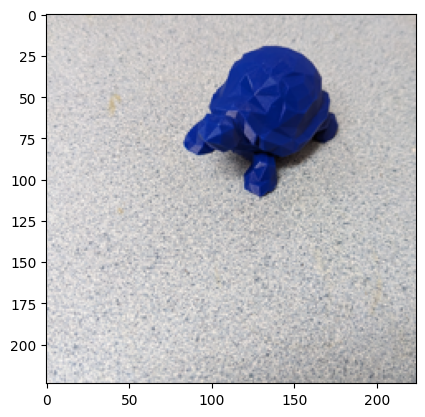

In [37]:
import matplotlib.pyplot as plt
plt.imshow(np.asarray(img2))

In [43]:
for c in classes:

    path = "real_data/" + c
    files = os.listdir(path)

    for i, img_path in enumerate(files):
        img = Image.open(os.path.join(path, img_path))

        w, h = img.size
        
        if h > w:
            diff = h - w
            diff /= 2.0
            top = int(diff)
            bot = top + w
            img = img.crop((0, top, w, bot))

        elif w > h:
            diff = w - h
            diff /= 2.0
            left = int(diff)
            right = left + h
            img = img.crop((left, 0, right, h))

        img = img.resize((224, 224))

        img.save(os.path.join("dataset/real_test", c, f"img{i}.jpg"))

    